<a href="https://colab.research.google.com/github/alt-shreya/MajorLeagueHacking/blob/alt-shreya-patch-1/MLH_LHD_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
    %tensorflow_version 2.x
except Exception:
  pass

secret handshake

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
from tensorflow.estimator import LinearClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
col_names = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species']
target_dimensions = ['Setosa','Versicolor','Virginica']
training_data_path=tf.keras.utils.get_file("iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_data_path=tf.keras.utils.get_file("iris_test.csv","https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

training=pd.read_csv(training_data_path,names=col_names,header=0)
training=training[training['Species']>=1]
training['Species']=training['Species'].replace([1,2],[0,1])

test=pd.read_csv(test_data_path, names=col_names,header=0)
test=test[test['Species']>=1]
test['Species']=test['Species'].replace([1,2],[0,1])

training.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

iris_dataset=pd.concat([training, test],axis=0)

iris_dataset.describe()

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,6.262000,2.872000,4.906000,1.676000,0.500000
std,0.662834,0.332751,0.825578,0.424769,0.502519
min,4.900000,2.000000,3.000000,1.000000,0.000000
25%,5.800000,2.700000,4.375000,1.300000,0.000000
50%,6.300000,2.900000,4.900000,1.600000,0.500000
75%,6.700000,3.025000,5.525000,2.000000,1.000000
max,7.900000,3.800000,6.900000,2.500000,1.000000


seaborn: huge static data
bokeh: live data
matplotlib: underlying libraries

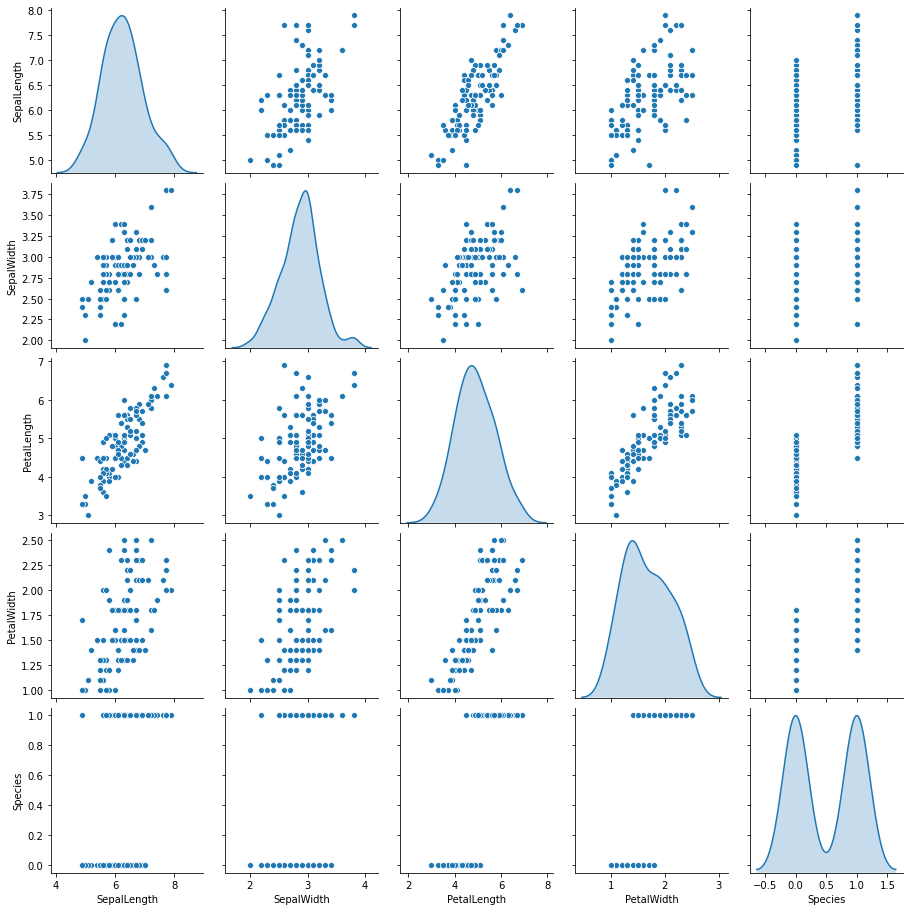

In [ ]:
sb.pairplot(iris_dataset, diag_kind='kde')

In [ ]:
correlation_data=iris_dataset.corr()
correlation_data.style.background_gradient(cmap='coolwarm', axis=None)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
SepalLength,1.000000,0.553855,0.828479,0.593709,0.494305
SepalWidth,0.553855,1.000000,0.519802,0.566203,0.308080
PetalLength,0.828479,0.519802,1.000000,0.823348,0.786424
PetalWidth,0.593709,0.566203,0.823348,1.000000,0.828129
Species,0.494305,0.308080,0.786424,0.828129,1.000000


In [ ]:
stats=iris_dataset.describe()
iris_stats=stats.transpose()
iris_stats

,count,mean,std,min,25%,50%,75%,max
SepalLength,100.0,6.262,0.662834,4.9,5.800,6.3,6.700,7.9
SepalWidth,100.0,2.872,0.332751,2.0,2.700,2.9,3.025,3.8
PetalLength,100.0,4.906,0.825578,3.0,4.375,4.9,5.525,6.9
PetalWidth,100.0,1.676,0.424769,1.0,1.300,1.6,2.000,2.5
Species,100.0,0.500,0.502519,0.0,0.000,0.5,1.000,1.0
